# Clustering using Color Histogram Frequencies

## Preclustering Stuff

### Library Importation and Path Definition

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import sklearn

In [3]:
# Some name constants
FEATS_FOLDER_NAME = 'features'
PROBS_FILE_NAME = 'incv1_probs.csv'
FEATS_FILE_NAME = 'incv1_feats.csv'
HIST_FILE_NAME = 'color_hist.csv'

In [4]:
# Some path constants
ROOT_DIR = os.path.join('.', '..')
FEATS_FOLDER_PATH = os.path.join(ROOT_DIR, FEATS_FOLDER_NAME)
PROBS_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, PROBS_FILE_NAME)
FEATS_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, FEATS_FILE_NAME)
HIST_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, HIST_FILE_NAME)

### Loading Data

In [5]:
data = pd.read_csv(HIST_FILE_PATH)

In [6]:
data.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,1222__pool_table__0.9999995.jpg,178,51,43,49,37,40,54,57,57,...,8,5,12,9,13,14,12,12,7,51
1,1328__coil__0.99999607.jpg,47,39,66,118,112,134,143,164,194,...,97,114,127,188,211,172,121,90,61,186
2,134__zebra__0.9999949.jpg,0,0,1,1,4,4,7,5,12,...,34,17,40,14,25,12,2,4,2,13
3,2377471__pizza__0.9999988.jpg,4,0,3,4,4,11,8,5,14,...,6,7,7,5,1,6,3,6,2,12
4,2377620__zebra__0.9999882.jpg,16,26,9,20,17,25,25,31,37,...,0,0,0,0,1,0,0,1,0,1


In [7]:
data.dtypes

Unnamed: 0    object
0              int64
1              int64
2              int64
3              int64
               ...  
763            int64
764            int64
765            int64
766            int64
767            int64
Length: 769, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Columns: 769 entries, Unnamed: 0 to 767
dtypes: int64(768), object(1)
memory usage: 1.2+ MB


We have 1001 float64 dimensions, which are the ones that represent the estimated class probabilities of the images. We also have an objetc column, which tells us the original name of the image used.

In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,387.333333,204.606061,168.843434,171.156566,159.818182,149.979798,149.666667,146.818182,146.858586,147.570707,...,74.873737,89.641414,87.050505,77.404040,76.060606,88.090909,91.994949,129.262626,148.611111,466.232323
std,723.253057,373.583329,307.828320,264.906785,227.388702,198.386255,190.395687,170.406642,162.618860,161.430102,...,211.150412,347.756023,283.796877,208.958229,169.976100,219.352119,270.572105,359.844230,547.233815,1550.317081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,9.000000,8.000000,12.000000,12.000000,16.000000,18.250000,20.250000,25.000000,29.000000,...,3.000000,2.250000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
50%,115.500000,59.000000,54.000000,87.500000,85.500000,83.000000,91.000000,85.500000,92.000000,84.000000,...,22.000000,17.000000,21.000000,17.000000,21.500000,19.000000,12.000000,16.500000,8.000000,39.500000
75%,374.750000,194.750000,170.250000,213.500000,198.750000,189.750000,208.500000,233.250000,226.750000,223.750000,...,68.750000,68.750000,75.750000,71.750000,81.500000,85.500000,72.250000,90.750000,64.750000,198.500000
max,4686.000000,2130.000000,1946.000000,1606.000000,1273.000000,1127.000000,1262.000000,1034.000000,937.000000,1039.000000,...,2272.000000,4404.000000,3294.000000,2122.000000,1683.000000,2052.000000,2461.000000,2841.000000,4939.000000,14342.000000


Although the last table does not show it, we know the range of posible values or our attributes is [0.0,1.0] because we are dealing with probabilities.

### Preprocessing the Data

In [10]:
data.values.shape

(198, 769)

In [11]:
X = data.values[:,1:].copy()

In [12]:
X.shape

(198, 768)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(198, 768)

## KMeans Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
def fit_kmeans(data, no_clusters):
    inertias = []
    scores = []
    for k in no_clusters:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        km.fit(data)
        inertias.append(km.inertia_)
        score = silhouette_score(data, km.labels_)
        scores.append(score)
    return inertias, scores

In [17]:
def plot_metrics(data, titles, xrange, xstep, figsize):
    ylabels = ['Inertias', 'Sil. Scores']
    fig, ax = plt.subplots(nrows=1, ncols=len(data), figsize=figsize)
    for i in range(len(data)):
        ax[i].plot(range(xrange[0], xrange[1]+xstep, xstep), data[i], '.b-')
        ax[i].xaxis.set_major_locator(plt.MultipleLocator(xstep))
        ax[i].set_xlabel('Number of clusters')
        ax[i].set_ylabel(ylabels[i])
        ax[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()
    return fig

### Scaled Data

In [18]:
std_inertias, std_scores = fit_kmeans(X_scaled, range(2, 32, 2))

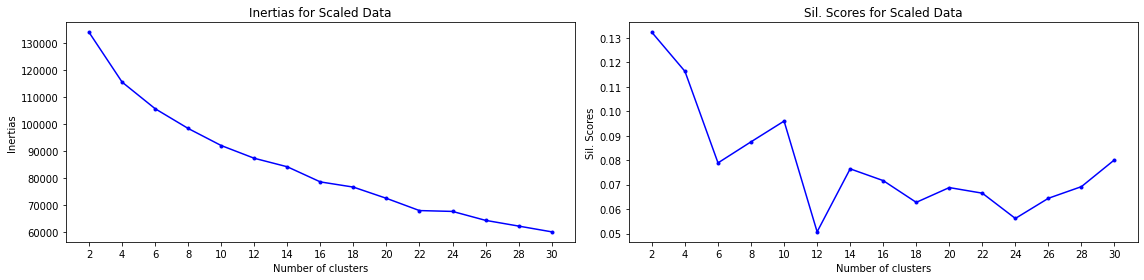

In [19]:
fig = plot_metrics((std_inertias, std_scores),
            ('Inertias for Scaled Data', 'Sil. Scores for Scaled Data'),
            (2, 30), 2, (16, 4))

### Unscaled Data

In [20]:
inertias, scores = fit_kmeans(X, range(2, 32, 2))

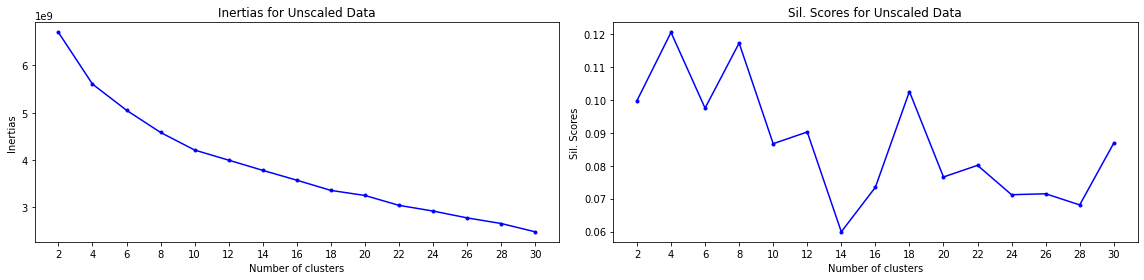

In [21]:
fig = plot_metrics((inertias, scores),
            ('Inertias for Unscaled Data', 'Sil. Scores for Unscaled Data'),
            (2, 30), 2, (16, 4))

There's no good value for k to perform a meaningful clustering analysis using KMeans

## DBSCAN Clustering

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [41]:
import math

In [79]:
def fit_dbscan(data, min_samples, eps_values, min_no_clusters=2, max_no_clusters=np.inf, min_clust_instances=20, max_clust_instances=np.inf, metric='euclidean'):
    scores, clusters, instances = [], [], []
    
    for m in min_samples:
        row_scores, row_clusters, row_instances = [], [], []
        for e in eps_values:
            db = DBSCAN(min_samples=m, eps=e, metric=metric).fit(data)
            # Get only non anomalous instances
            non_a = db.labels_ != -1 # [False, ..., False] if all are outliers
            # Calculate conditions
            n_clusters = len(np.unique(db.labels_[non_a])) # 0 if all are outliers
            n_instances = len(db.labels_[non_a]) # 0 if all are outliers
            # Apply conditions (why does it output NaN and not None?)
            if (n_clusters >= min_no_clusters and n_clusters <= max_no_clusters and n_instances >= min_clust_instances and n_instances <= max_clust_instances):
                score = silhouette_score(data[non_a], db.labels_[non_a], metric=metric)
            else:
                score = None
            # Store results
            row_scores.append(score)
            row_clusters.append(n_clusters)
            row_instances.append(n_instances)
        # Store row results
        scores.append(row_scores)
        clusters.append(row_clusters)
        instances.append(row_instances)
    # Prepare and return values
    ms_axis = pd.Index(min_samples, name='Min_samples')
    eps_axis = pd.Index(eps_values, name='Epsilon')
    df_scores = pd.DataFrame(scores, index=ms_axis, columns=eps_axis)
    df_clusters = pd.DataFrame(clusters, index=ms_axis, columns=eps_axis)
    df_instances = pd.DataFrame(instances, index=ms_axis, columns=eps_axis)
    return df_scores, df_clusters, df_instances

### Unscaled Data (Euclidean distance)

In [45]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 10, 2), np.arange(100, 500, 20), min_clust_instances=140)
dfs

Epsilon,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480
Min_samples,,,,,,,,,,,,,,,,,,,,
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [31]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 10, 2), np.arange(500, 900, 20), min_clust_instances=140)
dfs

Epsilon,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880
Min_samples,,,,,,,,,,,,,,,,,,,,
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [32]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 10, 2), np.arange(10, 110, 10), min_clust_instances=140)
dfs

Epsilon,10,20,30,40,50,60,70,80,90,100
Min_samples,,,,,,,,,,
2,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None


There does not seem to be any good parameters whatsoever for DBSCAN clustering

### TODO: Scaled Data (Euclidean distance)

### Unscaled Data (Cosine similarity)

In [50]:
dfs, dfc, dfi, lol = fit_dbscan(X, range(2, 12, 2), np.arange(0.02, 0.3, 0.02), min_clust_instances=140, metric='cosine')
dfs

Epsilon,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20,0.22,0.24,0.26,0.28
Min_samples,,,,,,,,,,,,,,
2,None,None,None,None,None,None,None,0.433374,0.159100,0.411263,0.357824,0.350335,0.340023,0.332335
4,None,None,None,None,None,None,None,0.440600,0.435882,NaN,NaN,NaN,NaN,NaN
6,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 6), np.arange(0.15, 0.31, 0.01), min_clust_instances=140, metric='cosine')
dfs

Epsilon,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30
Min_samples,,,,,,,,,,,,,,,,
2,None,0.433374,0.152378,0.159100,0.377852,0.411263,0.362002,0.357824,0.35612,0.350335,0.34772,0.340023,0.336646,0.332335,None,None
3,None,0.433374,0.431262,0.159100,0.410351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,None,0.440600,0.438243,0.435882,0.425490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [62]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 6), np.arange(0.16, 0.20, 0.005), min_clust_instances=140, metric='cosine')
dfs

Epsilon,0.160,0.165,0.170,0.175,0.180,0.185,0.190,0.195,0.200
Min_samples,,,,,,,,,
2,0.433374,0.431223,0.152378,0.159728,0.159100,0.142366,0.377852,0.362553,0.411263
3,0.433374,0.431223,0.431262,0.159728,0.159100,0.142366,0.410351,0.395382,NaN
4,0.440600,0.438350,0.438243,0.436228,0.435882,0.429583,0.425490,0.413674,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
dfc

Epsilon,0.160,0.165,0.170,0.175,0.180,0.185,0.190,0.195,0.200
Min_samples,,,,,,,,,
2,2,2,3,3,3,3,3,3,2
3,2,2,2,3,3,3,2,2,1
4,2,2,2,2,2,2,2,2,1
5,1,1,1,1,1,1,1,1,1


In [64]:
dfi

Epsilon,0.160,0.165,0.170,0.175,0.180,0.185,0.190,0.195,0.200
Min_samples,,,,,,,,,
2,148,150,155,157,158,161,163,167,169
3,148,150,153,157,158,161,161,165,167
4,147,149,152,153,154,156,159,163,165
5,138,143,146,146,147,149,152,157,161


We have two set of interesting parameters for a good DBSCAN clustering fit. First, using m=4 and e=0.16 we have a SScore of 0.44 with 147 instances clustered in 2 groups. On the other side, using m=2 and e=0.19 we have a lower SScore (0.37), but with 3 detected clusters and 163 instances.

In [65]:
dbscan_good_params = []
dbscan_good_params.append([2, 0.16, 'hist', 'cosine', 0.44, 2, 147])
dbscan_good_params.append([2, 0.19, 'hist', 'cosine', 0.37, 3, 163])

## Best results

In [80]:
df = pd.DataFrame(dbscan_good_params,
                  columns=['m', 'e', 'data', 'similarity', 'sscore', 'clusters', 'instances'])
df

,m,e,data,similarity,sscore,clusters,instances
0,2,0.16,hist,cosine,0.44,2,147
1,2,0.19,hist,cosine,0.37,3,163
